# Assignment 
Build a multiple linear regression model for the prediction of demand for shared bikes

# Problem Statement
Company want to understand the factors affecting the demand for the shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
3. Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:
Company required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Interpretation of Data
1) Reading/understanding/Visualising the data
2) Preparing the data for modelling
3) Training the model
4) Residual analysis
5) Prediction and Evaluation on the test data


In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')



# Step 1 - Reading and Understanding the Data

In [306]:
df =  pd.read_csv("day.csv")
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [307]:
df.shape

(730, 16)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [309]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [310]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [311]:
df.size

11680

In [312]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [313]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/18,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/18,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/18,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06/01/18,1,0,1,0,6,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07/01/18,1,0,1,0,0,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08/01/18,1,0,1,0,1,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09/01/18,1,0,1,0,2,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10/01/18,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Dropping columns

* Record Index
* dteday
* Casual and Registered


In [314]:
df.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [315]:
df.shape

(730, 12)

# Business Problem Statement 
Company required to model the demand for shared bikes with the available independent variables.

### Attributes Information
	- instant: record index  ---> Dropped
	- dteday : date ---> Dropped
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users ---> Dropped
	- registered: count of registered users ---> Dropped
	- cnt: count of total rental bikes including both casual and registered



In [316]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [317]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [318]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [319]:
num_col = ["cnt", "temp", "atemp", "hum", "windspeed"]
cat_col = ["yr", "holiday", "workingday", "weathersit","season", "mnth", "weekday"]

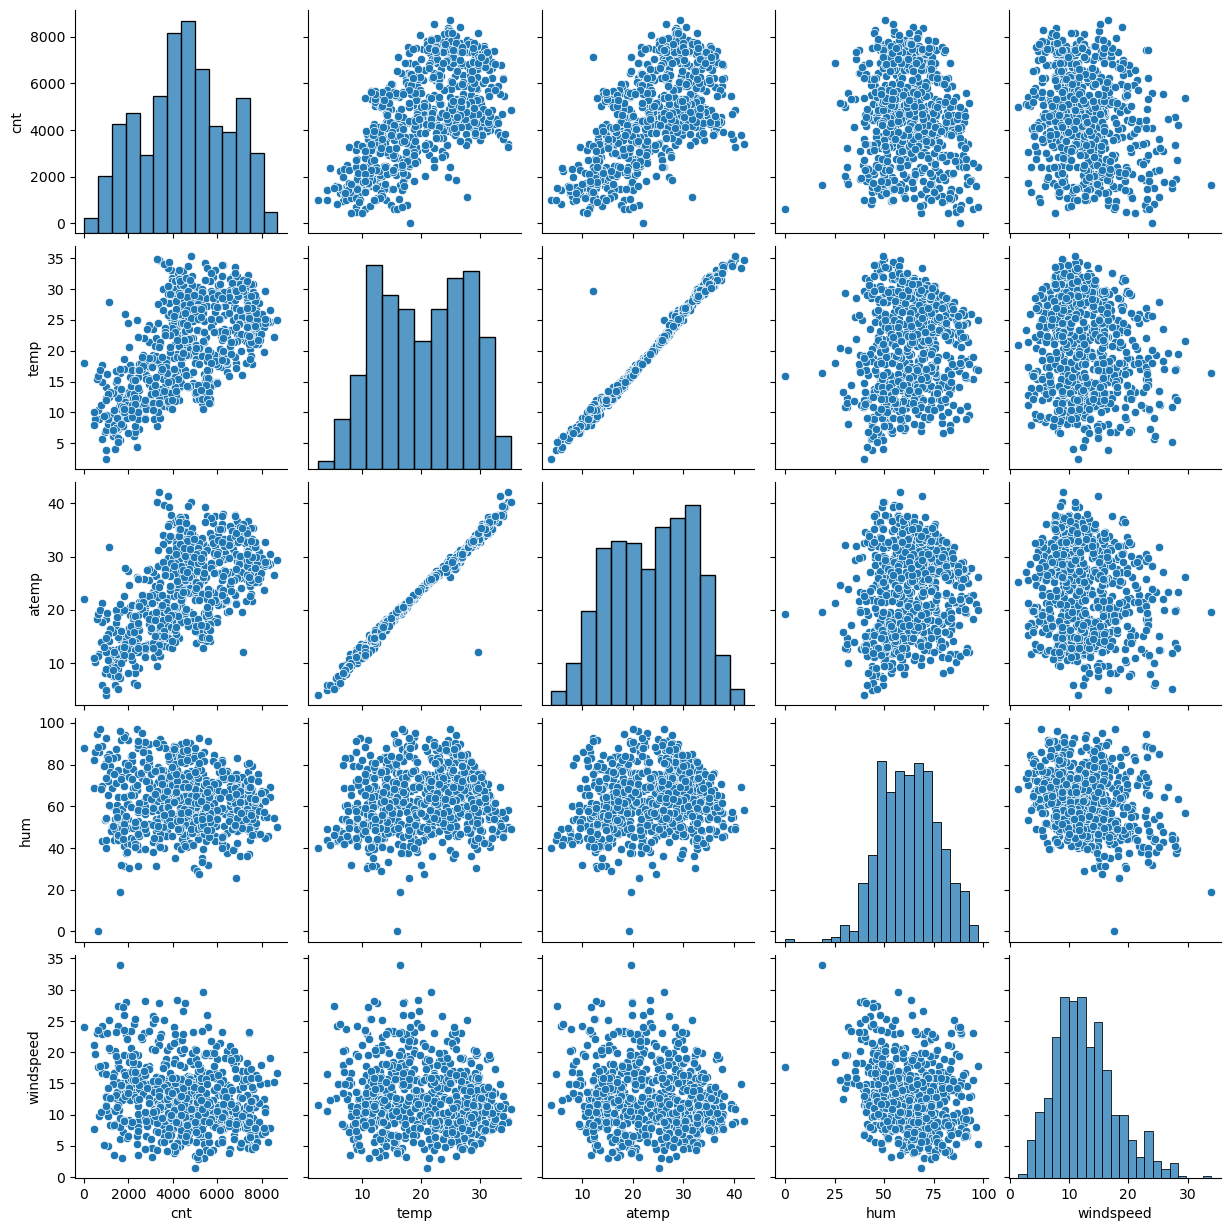

(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


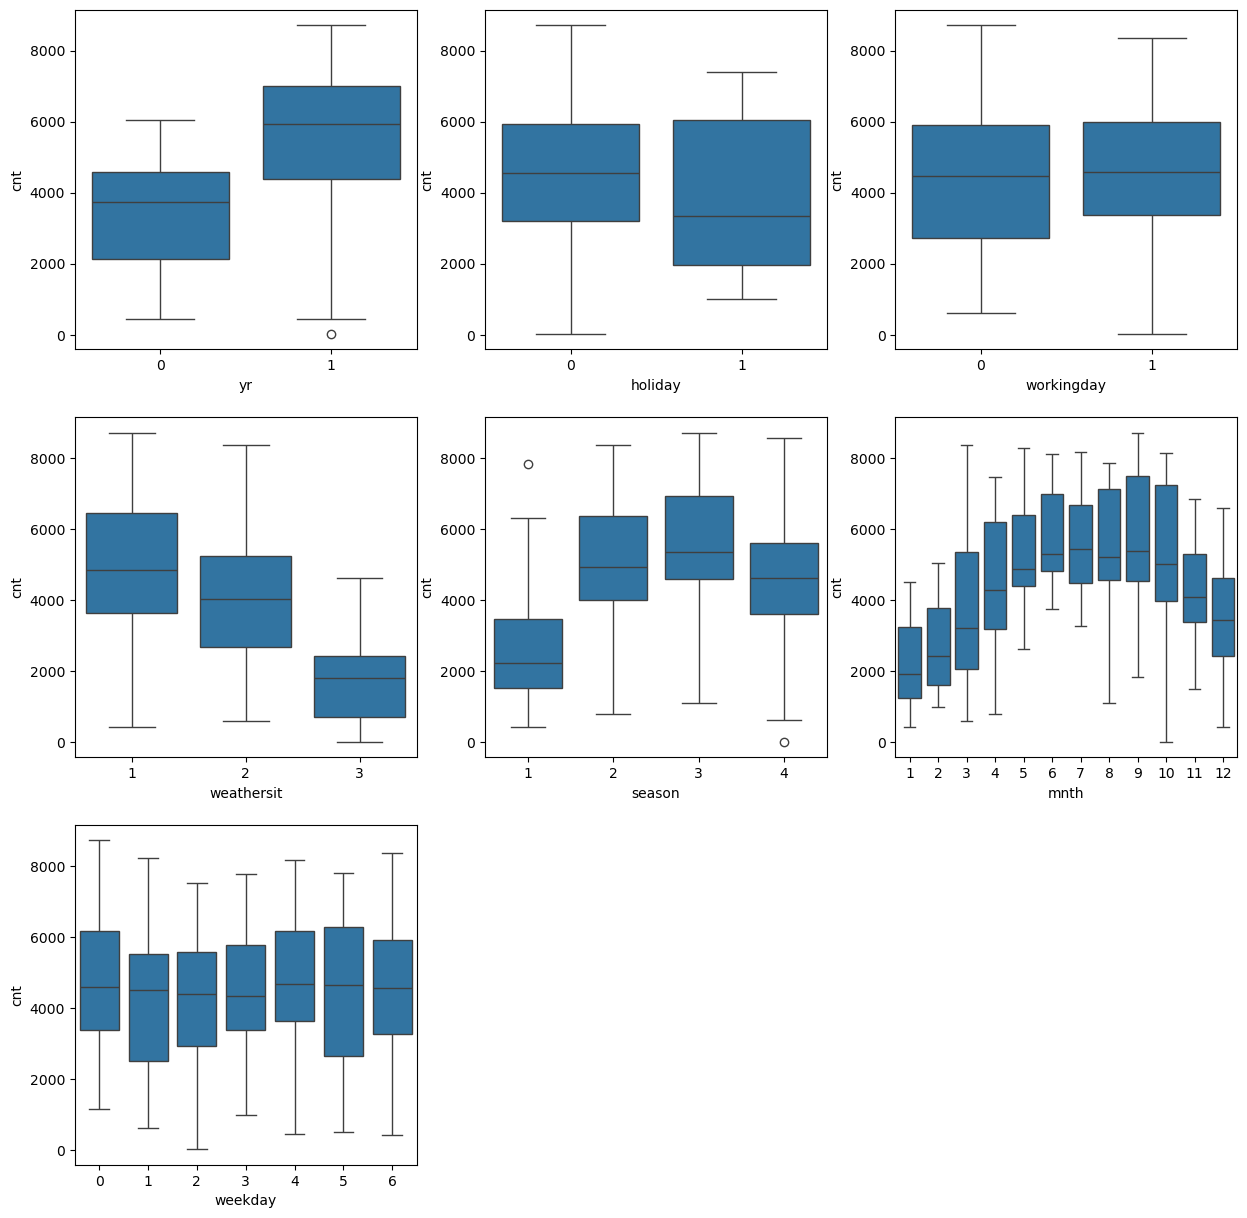

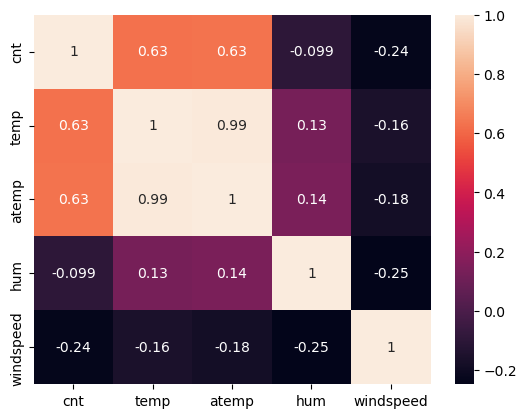

In [320]:
# Univariate Analysis
sns.pairplot(df[num_col])  # numerical - histplot  #categorical - countplot
plt.show()

# Bivariate Analysis     #numerical vs numerical - scatter plot  #categorical vs numerical - boxplot 
# plt.figure(figsize=(12,20))  
# plt.subplot(2,3,1)
# sns.boxplot(x="yr", y="cnt", data = df)

# plt.subplot(2,3,2)
# sns.boxplot(x="holiday", y="cnt", data = df)

# plt.subplot(2,3,3)
# sns.boxplot(x="workingday", y="cnt", data = df)

# plt.subplot(2,3,4)
# sns.boxplot(x="weathersit", y="cnt", data = df)

# plt.subplot(2,3,5)
# sns.boxplot(x="season", y="cnt", data = df)

# plt.subplot(2,3,6)
# sns.boxplot(x="mnth", y="cnt", data = df) 
# plt.show()

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

# Multivariate Analysis
sns.heatmap(df[num_col].corr(), annot=True )
plt.show()

### When Correlation between two features is 1 and -1  it indicates high similarity and and dropping one of the highly correlated features is advisable for several reasons:

* Redundancy: Highly correlated features convey the same information, leading to redundancy. Including both may not provide additional benefits and can result in multicollinearity issues.
* Simplicity and Interpretability: A model with fewer features is simpler and more interpretable. Redundant features do not add value and can complicate the interpretation of the model’s behavior.
* Computational Efficiency: Training and running a model with fewer features are often computationally more efficient, particularly with large datasets.
* Avoiding Overfitting: Including highly correlated features may contribute to overfitting, where the model fits the training data too closely and struggles to generalize to new, unseen data.

#### Inferences:-
*  Temp and atemp are highly corelated hence we can take action to remove one of them as it can create Multicolinearity
* Temp and atemp also has high corelation with cnt variable

In [321]:
# drop column atemp
df.drop(["atemp"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## Analysis of Categorical Variable with Target Variable

In [322]:
varlist = ['season', 'weekday', 'weathersit', 'mnth']

#df.season = df.season.apply(lambda x: x.map({ "1":"spring", "2":"summer", "3":"fall", "4":"winter"}))
df['season'] = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['weathersit'] = df.weathersit.map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Rainy"})

# season_dum =  pd.get_dummies(df['season'], dtype=int, drop_first=True)  
# weekday_dum =  pd.get_dummies(df['weekday'], dtype=int, drop_first=True)  
# mnth_dum =  pd.get_dummies(df['mnth'], dtype=int, drop_first=True)  
# weathersit_dum =  pd.get_dummies(df['weathersit'], dtype=int, drop_first=True)  

In [323]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Friday,1,Mist,10.420847,65.2917,23.458911,2114
726,spring,1,December,0,Saturday,1,Mist,10.386653,59.0000,10.416557,3095
727,spring,1,December,0,Sunday,0,Mist,10.386653,75.2917,8.333661,1341
728,spring,1,December,0,Monday,0,Clear,10.489153,48.3333,23.500518,1796


(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


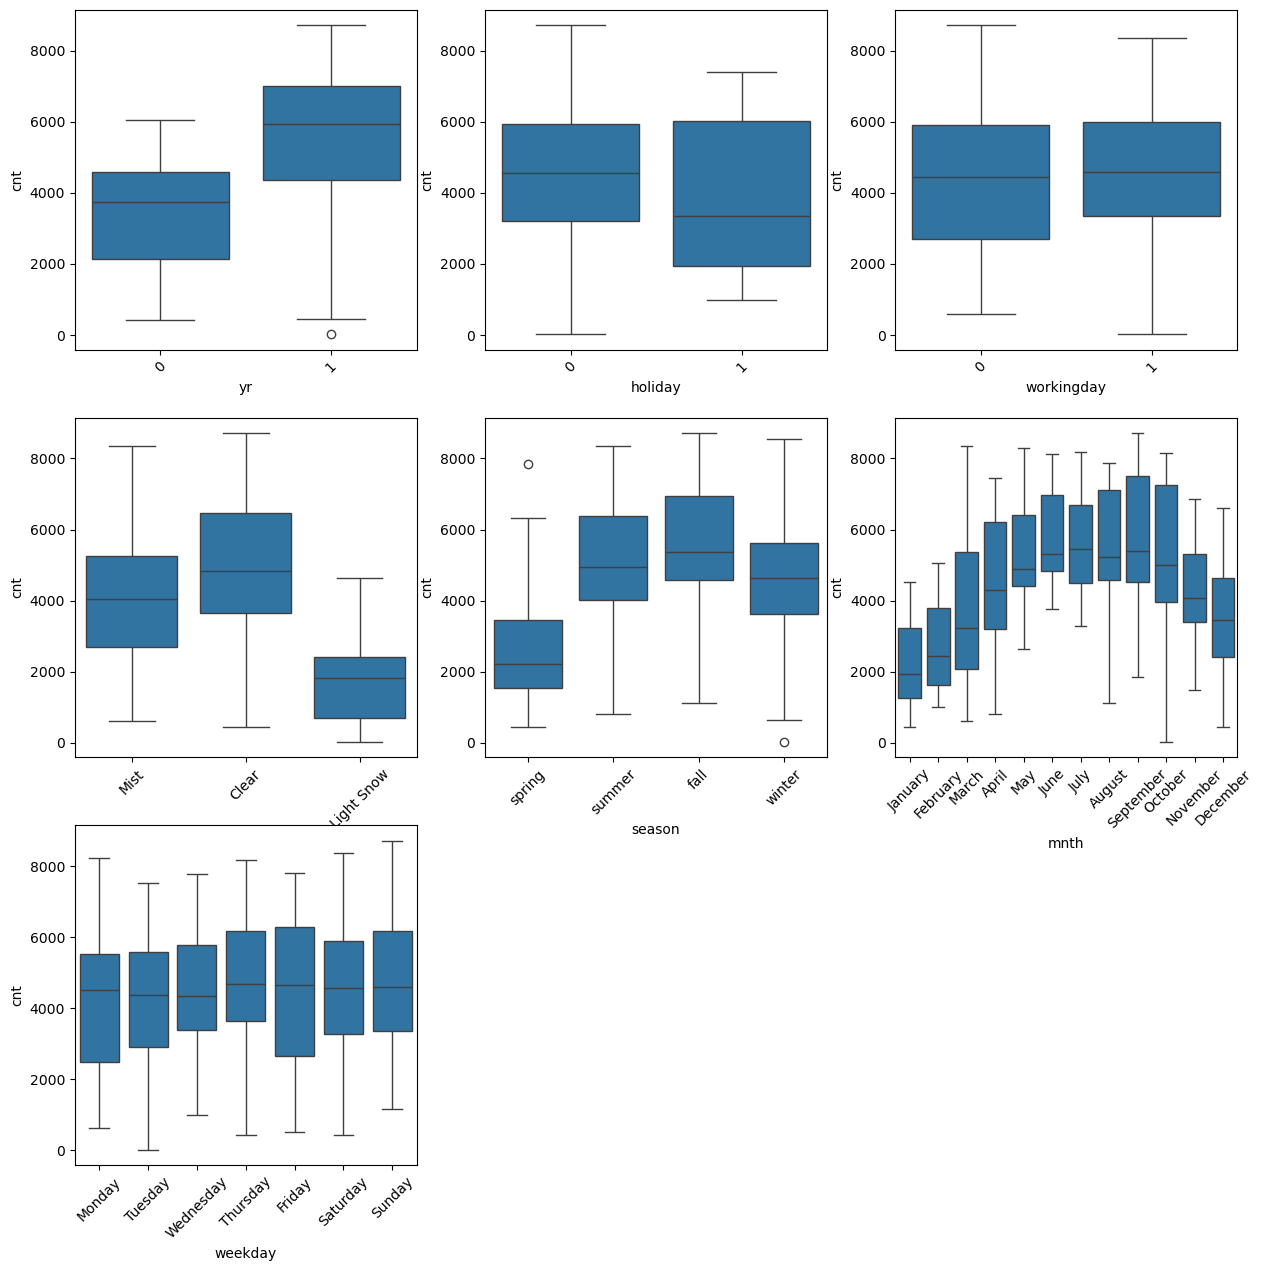

In [324]:
# Box Plot to see categorical columns to see the deman for Bike Analysis

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    a = sns.boxplot(data=df, x=i[1], y='cnt')
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

Inferences: -
* Season 3 fall has the highest demand
* demand grown immediate next year
* demand continously growing each month till September
* demand in holiday is increased
* demand in clear climate is more
* Demand on Saturday is increased

#### Verifying with Regression plot that corealation obtained above for variables w.r.t cnt is correct

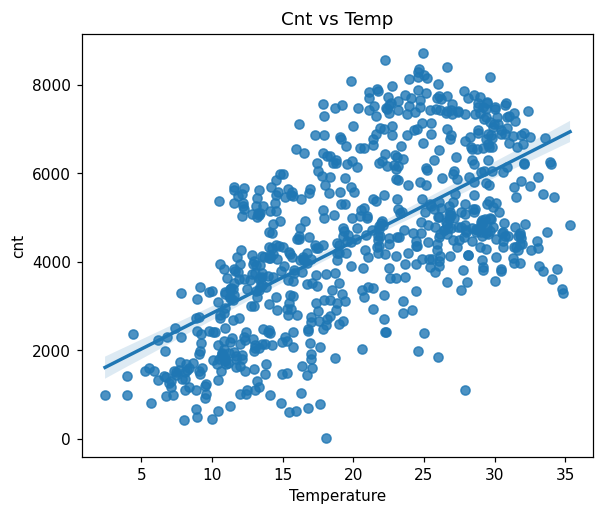

In [325]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Temp")
sns.regplot(data=df,y="cnt", x= "temp")
plt.xlabel("Temperature")
plt.show()

Inferences :-
Demands for bikes is highy corelated to Temp
We can see count is linearly increasing as temperature increases

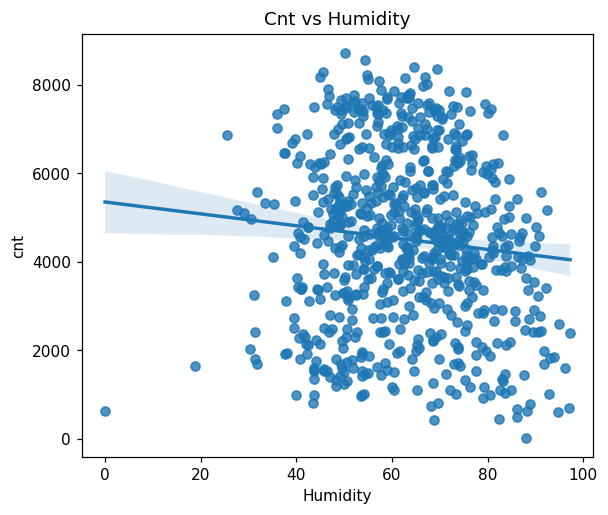

In [326]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Humidity")
sns.regplot(data=df,y="cnt", x= "hum")
plt.xlabel("Humidity")
plt.show()

Inferences:-
Demands is decreasing as the humidity is increasing
Demand for bike is negativley corelated with Humidity

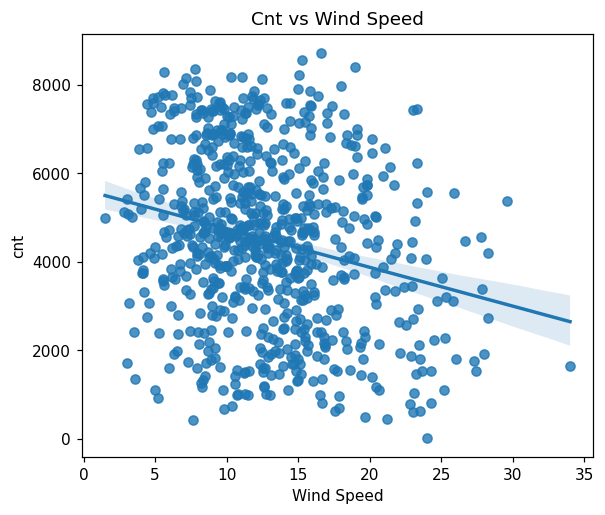

In [327]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Wind Speed")
sns.regplot(data=df,y="cnt", x= "windspeed")
plt.xlabel("Wind Speed")
plt.show()

Inferences:-
Demands is decreasing as the windspeed is increasing
Demand for bike is negativley corelated with Windspeed

# Step 2 - Preparing the Data for Modelling
Encoding:-
 - Converting binary 1/0
 - Converting to dummy variables

### Create dummy variables for all Categorical Variables

In [328]:
df_bikessharing =  pd.get_dummies(data=df,columns=varlist,drop_first= True, dtype=int)

In [329]:
df_bikessharing.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [330]:
df_bikessharing.shape

(730, 29)

In [331]:
df_bikessharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow',
       'weathersit_Mist', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September'],
      dtype='object')

# Step 3 - Model Building 
### Train-Test Split

In [332]:
y = df_bikessharing.pop("cnt")
X = df_bikessharing

In [333]:
X.shape

(730, 28)

In [334]:
y.shape

(730,)

### Mixed Approach - Automated Approach and Step Wise Reducing Feature using VIF and P stats

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=100)

In [336]:
y_train.shape

(510,)

In [337]:
X_train.shape

(510, 28)

In [338]:
X_test.shape

(220, 28)

In [339]:
y_test.shape

(220,)

In [340]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
576,1,0,1,29.246653,70.4167,11.083475,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,13.803347,72.9583,14.707907,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [341]:
X_train.columns = X_train.columns.astype('str')
X_test.columns =  X_test.columns.astype('str')

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [342]:
X_train.dtype

dtype('float64')

In [343]:
X_train

array([[ 0.98443485, -0.16173108,  0.69156407, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [ 0.98443485, -0.16173108, -1.44599761, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [ 0.98443485, -0.16173108, -1.44599761, ..., -0.30727935,
        -0.30344207, -0.29566881],
       ...,
       [-1.01581126, -0.16173108, -1.44599761, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [-1.01581126, -0.16173108,  0.69156407, ..., -0.30727935,
        -0.30344207, -0.29566881],
       [ 0.98443485, -0.16173108,  0.69156407, ..., -0.30727935,
        -0.30344207, -0.29566881]])

In [344]:
X_train_df = pd.DataFrame(X_train,columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [345]:
X_train_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,0.984435,-0.161731,0.691564,1.230870,0.515796,-0.331282,-0.566783,-0.572822,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,3.475187,-0.287754,-0.32969,-0.303442,-0.307279,-0.303442,-0.295669
1,0.984435,-0.161731,-1.445998,-0.421238,-0.070634,-0.386359,1.764342,-0.572822,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,-0.287754,-0.287754,3.03315,-0.303442,-0.307279,-0.303442,-0.295669


In [346]:
X_test_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,-1.015811,6.183104,-1.445998,1.304506,0.047244,-1.395126,-0.566783,-0.572822,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,3.475187,-0.287754,-0.32969,-0.303442,-0.307279,-0.303442,-0.295669
1,0.984435,-0.161731,0.691564,1.612837,-0.276917,-0.985373,-0.566783,1.745743,-0.572822,-0.428129,...,-0.303442,-0.267261,-0.311086,-0.287754,3.475187,-0.32969,-0.303442,-0.307279,-0.303442,-0.295669


### Feature Selection - There are two methods Standaridization and MinMax, here we have used Standaridization

In [347]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [348]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=15)

In [349]:
selector = selector.fit(X_train, y_train)
print(selector.support_)

[ True  True False  True  True  True  True  True  True False False False
 False False False  True  True False  True False  True  True False False
 False  True False  True]


In [350]:
selected_features = X_train_df.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Snow',
       'weathersit_Mist', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September'],
      dtype='object')

In [351]:
X_train = X_train_df[selected_features]
X_test = X_test_df[selected_features]
X_train.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September
0,0.984435,-0.161731,1.230870,0.515796,-0.331282,-0.566783,-0.572822,-0.572822,-0.174078,-0.725911,-0.303442,-0.311086,3.475187,-0.307279,-0.295669
1,0.984435,-0.161731,-0.421238,-0.070634,-0.386359,1.764342,-0.572822,-0.572822,-0.174078,1.377580,-0.303442,-0.311086,-0.287754,-0.307279,-0.295669


### Modelling

In [352]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [353]:
X_train_sm.shape

(510, 16)

In [354]:
X_test_sm.shape

(220, 16)

In [355]:
y_train.shape

(510,)

In [356]:
X_train_sm.dtypes

const                    float64
yr                       float64
holiday                  float64
temp                     float64
hum                      float64
windspeed                float64
season_spring            float64
season_summer            float64
season_winter            float64
weathersit_Light Snow    float64
weathersit_Mist          float64
mnth_December            float64
mnth_January             float64
mnth_July                float64
mnth_November            float64
mnth_September           float64
dtype: object

In [357]:
y_train.dtypes

dtype('int64')

### Model 1

In [358]:
model1 = sm.OLS(np.array(y_train), X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          8.15e-189
Time:                        00:55:02   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.527    129.908      0.000    4417.499    4553.175
yr                     1001.2124     35.146     28.487      0.000     932.158    1070.267
holiday                -124.7858     35.085     -3.557      0.000    -193.719     -55.852
temp                    944.3387     72.612     13.005      0.000     801.673    1087.005
hum                    -205.4346     47.871     -4.291      0.000    -299.491    -111.378
windspeed              -278.2733     38.042     -7.315      0.000    -353.017    -203.530
season_spring          -228.3990     79.270     -2.881      0.004    -384.146     -72.652
season_summer           158.7157     57.476      2.761      0.006      45.789     271.643
season_winter           382.0872     67.552      5.656      0.000     249.363     514.812
weathersit_Light Snow  -361.9773     38.795     -9.331      0.000    -438.200    -285.754
weathersit_Mist        -224.3781     43.196     -5.194      0.000    -309.249    -139.507
mnth_December           -85.6425     42.306     -2.024      0.043    -168.764      -2.521
mnth_January           -107.0241     44.719     -2.393      0.017    -194.888     -19.160
mnth_July              -127.6219     42.124     -3.030      0.003    -210.386     -44.858
mnth_November           -94.4481     45.920     -2.057      0.040    -184.670      -4.226
mnth_September          178.3557     39.935      4.466      0.000      99.892     256.820
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         5.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [359]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.036180
2,holiday,1.032559
3,temp,4.422781
4,hum,1.922351
5,windspeed,1.213953
6,season_spring,5.271002
7,season_summer,2.771083
8,season_winter,3.827851
9,weathersit_Light Snow,1.262484


We could have 
 
 - High P-values , high VIF
 - High - Low
    - High P , Low VIF -- remove these first
    - Low P, High VIF  -- remove these after the ones above

 - Low P, Low VIF   

In [360]:
X_train_sm = X_train_sm.drop("season_spring", axis=1)
X_test_sm = X_test_sm.drop("season_spring", axis=1)

Inferences - When there is high P and Low VIF, we need to remove first these
* mnth_August has high P-stats
* R2 and adjusted R2 are similar and good i.e. 84% 

### Model 2

In [361]:
model2 = sm.OLS(np.array(y_train), X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          3.50e-188
Time:                        00:55:02   Log-Likelihood:                -4115.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     495   BIC:                             8325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.781    128.960      0.000    4417.001    4553.673
yr                      995.1681     35.341     28.159      0.000     925.731    1064.605
holiday                -129.5511     35.303     -3.670      0.000    -198.914     -60.189
temp                   1088.4527     53.025     20.527      0.000     984.271    1192.634
hum                    -220.5566     47.932     -4.601      0.000    -314.733    -126.380
windspeed              -290.6791     38.075     -7.634      0.000    -365.488    -215.870
season_summer           273.4279     41.758      6.548      0.000     191.383     355.473
season_winter           513.2007     50.292     10.204      0.000     414.388     612.013
weathersit_Light Snow  -352.7759     38.947     -9.058      0.000    -429.298    -276.254
weathersit_Mist        -212.5271     43.316     -4.906      0.000    -297.633    -127.421
mnth_December           -71.2024     42.317     -1.683      0.093    -154.345      11.940
mnth_January           -116.3787     44.929     -2.590      0.010    -204.654     -28.103
mnth_July              -104.4971     41.656     -2.509      0.012    -186.342     -22.652
mnth_November           -70.4016     45.487     -1.548      0.122    -159.773      18.969
mnth_September          213.4522     38.312      5.571      0.000     138.178     288.726
==============================================================================
Omnibus:                       58.341   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.396
Skew:                          -0.649   Prob(JB):                     4.36e-27
Kurtosis:                       5.007   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.032488
2,holiday,1.030265
3,temp,2.324239
4,hum,1.899245
5,windspeed,1.198402
6,season_summer,1.441472
7,season_winter,2.090852
8,weathersit_Light Snow,1.253929
9,weathersit_Mist,1.551024


In [363]:
res2.params

const                    4485.337255
yr                        995.168080
holiday                  -129.551143
temp                     1088.452720
hum                      -220.556636
windspeed                -290.679056
season_summer             273.427934
season_winter             513.200711
weathersit_Light Snow    -352.775909
weathersit_Mist          -212.527066
mnth_December             -71.202384
mnth_January             -116.378709
mnth_July                -104.497141
mnth_November             -70.401630
mnth_September            213.452159
dtype: float64

Inferences - When there is high P and Low VIF, we need to remove first these
* mnth_May has high P-stats
* R2 and adjusted R2 are similar and good i.e. 84% 

In [364]:
X_train_sm = X_train_sm.drop("mnth_November", axis=1)
X_test_sm = X_test_sm.drop("mnth_November", axis=1)

### Model 3

In [365]:
model3 = sm.OLS(np.array(y_train), X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          7.91e-189
Time:                        00:55:02   Log-Likelihood:                -4117.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.830    128.779      0.000    4416.905    4553.769
yr                      995.1166     35.391     28.118      0.000     925.582    1064.651
holiday                -135.7075     35.128     -3.863      0.000    -204.725     -66.690
temp                   1103.0623     52.251     21.111      0.000    1000.401    1205.723
hum                    -219.8072     47.997     -4.580      0.000    -314.111    -125.504
windspeed              -290.5859     38.129     -7.621      0.000    -365.499    -215.673
season_summer           277.5671     41.731      6.651      0.000     195.576     359.559
season_winter           473.5545     43.341     10.926      0.000     388.400     558.709
weathersit_Light Snow  -349.1023     38.929     -8.968      0.000    -425.589    -272.615
weathersit_Mist        -210.9522     43.365     -4.865      0.000    -296.154    -125.751
mnth_December           -46.0766     39.134     -1.177      0.240    -122.965      30.812
mnth_January           -106.3012     44.517     -2.388      0.017    -193.767     -18.836
mnth_July              -106.5677     41.693     -2.556      0.011    -188.485     -24.651
mnth_September          219.7520     38.148      5.760      0.000     144.799     294.705
==============================================================================
Omnibus:                       55.188   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.061
Skew:                          -0.625   Prob(JB):                     4.64e-25
Kurtosis:                       4.926   Cond. No.                         2.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences - When there is high P and Low VIF, we need to remove first these
* mnth_February has high P-stats
* R2 and adjusted R2 are similar and good i.e. 84% 

In [366]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.032487
2,holiday,1.017186
3,temp,2.250584
4,hum,1.899051
5,windspeed,1.198399
6,season_summer,1.435560
7,season_winter,1.548439
8,weathersit_Light Snow,1.249272
9,weathersit_Mist,1.550168


In [367]:
res3.params

const                    4485.337255
yr                        995.116589
holiday                  -135.707513
temp                     1103.062279
hum                      -219.807223
windspeed                -290.585944
season_summer             277.567122
season_winter             473.554491
weathersit_Light Snow    -349.102303
weathersit_Mist          -210.952233
mnth_December             -46.076610
mnth_January             -106.301203
mnth_July                -106.567717
mnth_September            219.752032
dtype: float64

In [368]:
X_train_sm = X_train_sm.drop("mnth_December", axis=1)
X_test_sm = X_test_sm.drop("mnth_December", axis=1)

### Model 4

In [369]:
model4 = sm.OLS(np.array(y_train), X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.04e-189
Time:                        00:55:02   Log-Likelihood:                -4117.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     497   BIC:                             8317.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4485.3373     34.843    128.729      0.000    4416.879    4553.795
yr                      994.7679     35.403     28.098      0.000     925.209    1064.327
holiday                -134.3037     35.121     -3.824      0.000    -203.308     -65.300
temp                   1120.9031     50.025     22.407      0.000    1022.616    1219.190
hum                    -225.2980     47.789     -4.714      0.000    -319.191    -131.405
windspeed              -287.1956     38.034     -7.551      0.000    -361.924    -212.468
season_summer           283.5479     41.437      6.843      0.000     202.135     364.961
season_winter           467.6819     43.070     10.859      0.000     383.061     552.303
weathersit_Light Snow  -345.0272     38.790     -8.895      0.000    -421.241    -268.814
weathersit_Mist        -208.0727     43.313     -4.804      0.000    -293.171    -122.974
mnth_January            -94.2402     43.340     -2.174      0.030    -179.392      -9.089
mnth_July              -108.1268     41.688     -2.594      0.010    -190.034     -26.220
mnth_September          222.9952     38.064      5.858      0.000     148.210     297.781
==============================================================================
Omnibus:                       53.439   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.260
Skew:                          -0.611   Prob(JB):                     5.11e-24
Kurtosis:                       4.885   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [370]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.032415
2,holiday,1.016014
3,temp,2.061318
4,hum,1.881124
5,windspeed,1.191564
6,season_summer,1.414290
7,season_winter,1.527932
8,weathersit_Light Snow,1.239398
9,weathersit_Mist,1.545237


In [371]:
res4.params

const                    4485.337255
yr                        994.767878
holiday                  -134.303721
temp                     1120.903098
hum                      -225.298031
windspeed                -287.195643
season_summer             283.547921
season_winter             467.681907
weathersit_Light Snow    -345.027240
weathersit_Mist          -208.072664
mnth_January              -94.240224
mnth_July                -108.126838
mnth_September            222.995163
dtype: float64

We could have 
 
 - High P-values , high VIF
 - High - Low
    - High P , Low VIF -- remove these first
    - Low P, High VIF  -- remove these after the ones above

 - Low P, Low VIF 

Inferences - End check is Low P and High VIF, we need to remove first these
* season_spring has high VIF
* R2 and adjusted R2 are similar and good i.e. 84% 

# Step 4 - Residual Analysis

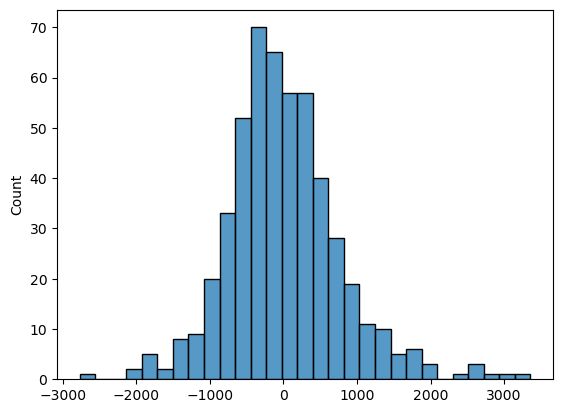

In [372]:
#y_train_pred = model7.predict(X_train_sm)
sns.histplot(res4.predict(X_train_sm) - y_train.reset_index(drop=True))
plt.show()



# Step 5 - Predictions and Evaluation on Test Set
# fit() - Train
# transform() - Test

In [373]:
res4.params

const                    4485.337255
yr                        994.767878
holiday                  -134.303721
temp                     1120.903098
hum                      -225.298031
windspeed                -287.195643
season_summer             283.547921
season_winter             467.681907
weathersit_Light Snow    -345.027240
weathersit_Mist          -208.072664
mnth_January              -94.240224
mnth_July                -108.126838
mnth_September            222.995163
dtype: float64

In [374]:
# predict
y_test_pred = res4.predict(X_test_sm)
y_test_pred

0      3427.408524
1      8072.264804
2      3479.909837
3      5279.982380
4      5472.517271
          ...     
215    6155.640941
216    4588.684016
217    7138.447343
218    2661.903938
219    6359.276420
Length: 220, dtype: float64

# Step 6-  R2 Score 

In [375]:
# evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test ,y_pred=y_test_pred)

0.8034772805912219

In [376]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)   

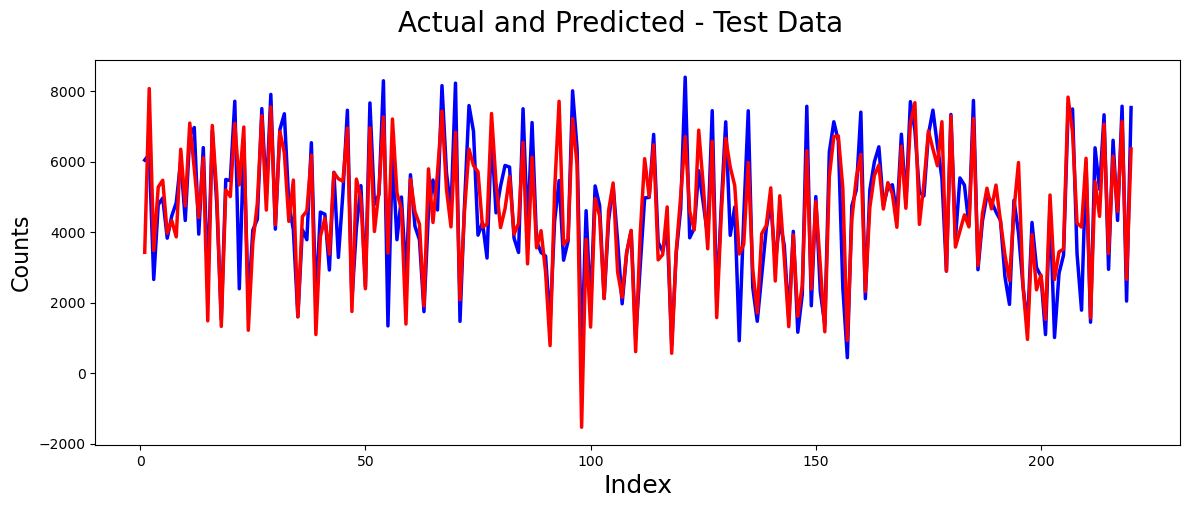

In [377]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')